In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geohash2
from shapely.geometry import Point
import seaborn as sns
import transbigdata as tbd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.colors as mcolors
colors = ["#24c07c", "#00acff", '#ff735b']
custom_cmap = mcolors.ListedColormap(colors)

# These are the tags we are categorized as fast food:
# fried chicken, western fast food, and fast food simple meal
ff_tag = ['炸鸡/鸡排/炸串', '西式快餐', '快餐简餐']

# Figure 6: Spatial Clustering

In [3]:
## Example data of Clustering

# data = pd.read_csv('geohash6_with_third_tag_name_point_count.csv', index_col=0)
# X = data.values
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# K_num_clusters = 5
# kmeans = KMeans(n_clusters=K_num_clusters, n_init=10)
# kmeans.fit(X_scaled)
# data['K-means_Cluster'] = kmeans.labels_

In [4]:
def get_df(df_name):
    data = pd.read_csv(df_name)
    def convert_geohash_to_geometry(geohash):
        lat, lon = geohash2.decode_exactly(geohash)[:2]
        return Point(lon, lat)

    eats = [x for x in data.columns if x not in ['geohash6', 'K-means_Cluster', 'Hierarchical_Cluster']]
    
    data['geometry'] = data['geohash6'].apply(convert_geohash_to_geometry)
    data['geometry'] =  tbd.geohash_togrid(data.geohash6)

    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(data, geometry='geometry')
    gdf['total_ff'] = gdf[ff_tag].sum(axis = 1)
    gdf['total_dine'] = gdf[eats].sum(axis = 1)
    gdf['ff_ratio'] = gdf.total_ff / gdf.total_dine
    return gdf

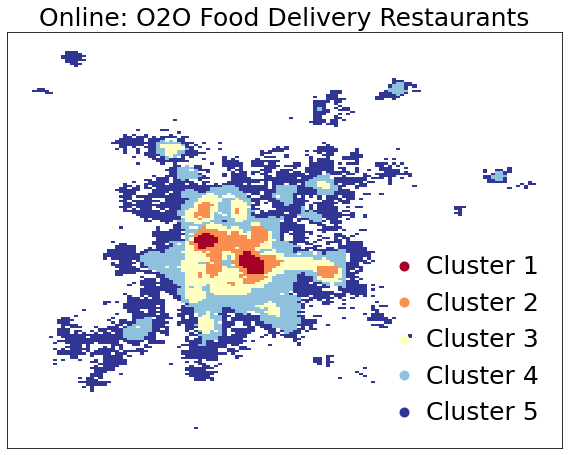

In [ ]:
gdf = get_df('Clustered_access_data_5.csv')

change = {0:3, 1:4, 2:1, 3:2, 4:0}
gdf['K-means_Cluster'] = gdf['K-means_Cluster'].apply(lambda x: change[x])

# Step 3: Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
gdf['c_type'] = gdf['K-means_Cluster'].apply(lambda x: f'Cluster {x+1}')
# Plot each cluster with different color
# for cluster, color in zip(range(5), ['red', 'blue', 'green', 'orange', 'purple']):
gdf.plot(ax=ax, column = 'c_type', legend = True, cmap = 'RdYlBu', legend_kwds = {'frameon': False, 
   'loc': 'lower right', 'fontsize': 25, 'handletextpad': -0.1})
plt.title('Online: O2O Food Delivery Restaurants', size = 25)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

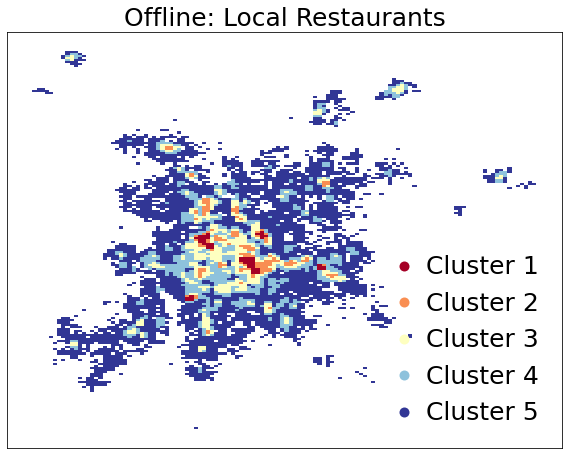

In [ ]:
gdf = get_df('Clustered_access_data_5_1km.csv')

change = {0:4, 1:2, 2:0, 3:3, 4:1}
gdf['K-means_Cluster'] = gdf['K-means_Cluster'].apply(lambda x: change[x])

# Step 3: Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
gdf['c_type'] = gdf['K-means_Cluster'].apply(lambda x: f'Cluster {x+1}')
# Plot each cluster with different color
# for cluster, color in zip(range(5), ['red', 'blue', 'green', 'orange', 'purple']):
gdf.plot(ax=ax, column = 'c_type', legend = True, cmap = 'RdYlBu', legend_kwds = {'frameon': False,
 'loc': 'lower right', 'fontsize': 25, 'handletextpad': -0.1})
plt.title('Offline: Local Restaurants', size = 25)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# Compare Online and Offline Clusters

gdf = get_df('Clustered_access_data_5.csv')
change = {0:3, 1:4, 2:1, 3:2, 4:0}
gdf['K-means_Cluster'] = gdf['K-means_Cluster'].apply(lambda x: change[x])

gdf_1 = get_df('Clustered_access_data_5_1km.csv')
change = {0:4, 1:2, 2:0, 3:3, 4:1}
gdf_1['K-means_Cluster'] = gdf_1['K-means_Cluster'].apply(lambda x: change[x])

gdf['t'] = 'Online'
gdf_1['t'] = 'Offline'
aa = pd.concat([gdf_1, gdf], ignore_index = True)

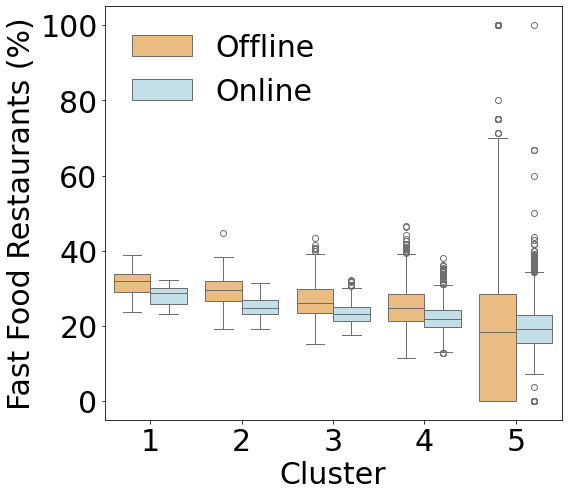

In [8]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.boxplot(data = aa, x = 'K-means_Cluster', y = 'ff_ratio', hue = 't', palette = 'RdYlBu')
plt.xlabel('Cluster', size = 30)
plt.ylabel('Fast Food Restaurants (%)', size = 30)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5], size = 30)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100], size = 30)
plt.yticks(size = 30)
plt.legend(frameon = False, fontsize = 30)
plt.tight_layout()
plt.show()

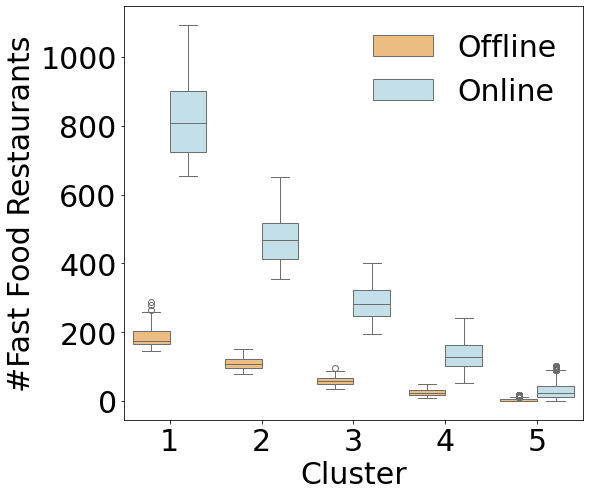

In [9]:
fig, ax = plt.subplots(figsize=(8.3, 7))
sns.boxplot(data = aa, x = 'K-means_Cluster', y = 'total_ff', hue = 't', palette = 'RdYlBu')
plt.xlabel('Cluster', size = 30)
plt.ylabel('#Fast Food Restaurants', size = 30)
plt.xticks([0, 1, 2, 3, 4], [1,2,3, 4, 5], size = 30)
plt.yticks(size = 30)
plt.legend(frameon = False, fontsize = 30)
plt.tight_layout()
plt.show()

# Figure 7: Environment vs. Order

In [ ]:
all_months = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805']
dd = pd.read_csv('geohash_preference.csv')
dd['location_pref_ff'] = dd[['ff_'+x for x in all_months]].sum(axis = 1) / dd[['total_'+x for x in all_months]].sum(axis = 1)
dd = dd[['geohash6', 'location_pref_ff']]

dd1 = pd.merge(dd, gdf[['geohash6', 'ff_ratio']], on  = 'geohash6')
dd2 = pd.merge(dd, gdf_1[['geohash6', 'ff_ratio']], on  = 'geohash6')

dd1['lev'] = pd.cut(dd1['ff_ratio'], bins = [-1, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 1.05])
dd2['lev'] = pd.cut(dd2['ff_ratio'], bins = [-1, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 1.05])

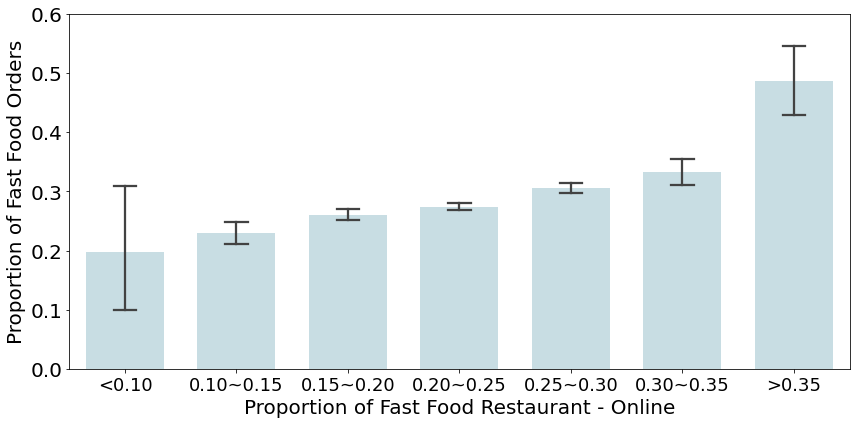

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = dd1, x = 'lev', y = 'location_pref_ff', capsize = 0.2, width = 0.7, color = '#C3DFE8')
plt.xlabel('Proportion of Fast Food Restaurant - Online', size = 20)
plt.ylabel('Proportion of Fast Food Orders', size = 20)
plt.xticks([0,1,2,3,4,5,6], ['<0.10', '0.10~0.15', '0.15~0.20','0.20~0.25','0.25~0.30','0.30~0.35','>0.35'], size = 18)
plt.yticks(size = 20)
plt.ylim(0, 0.6)
plt.tight_layout()
plt.show()

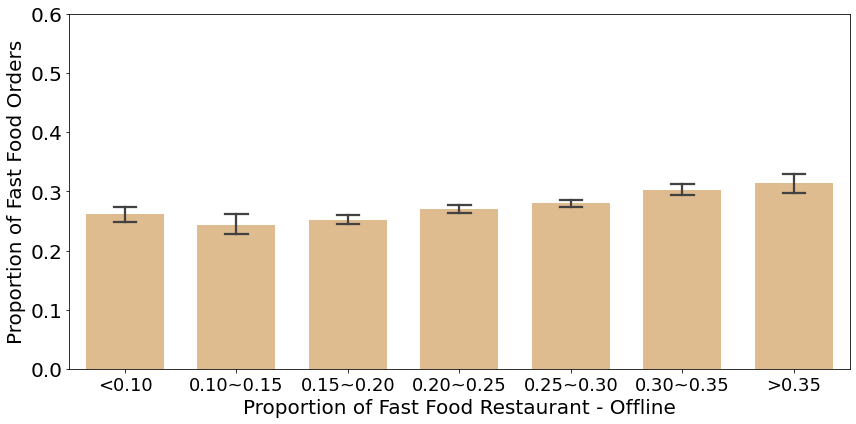

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = dd2, x = 'lev', y = 'location_pref_ff', capsize = 0.2, width = 0.7, color = '#ECBD82')
plt.xlabel('Proportion of Fast Food Restaurant - Offline', size = 20)
plt.ylabel('Proportion of Fast Food Orders', size = 20)
plt.xticks([0, 1, 2, 3, 4], [1,2,3, 4, 5], size = 20)
plt.yticks(size = 20)
plt.xticks([0,1,2,3,4,5,6], ['<0.10', '0.10~0.15', '0.15~0.20','0.20~0.25','0.25~0.30','0.30~0.35','>0.35'], size = 18)
plt.ylim(0, 0.6)
plt.tight_layout()
plt.show()